<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/algo_implementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Implementations of Algorithms

[![scikit-learn logo](./img/scikit-learn-logo-small.png)](https://scikit-learn.org/stable/)

In the previous notebooks we learned about the different Regression and Classification algorithms and their usage from the Scikit-Learn library:
* Linear regression
* kNN Regression
* Logistic Regression
* kNN Classification
* SVM classification

We also used a few important theoretical concepts:
* Cross-validation - choosing the best model
* Accuracy estimation for regression and classification
* Data cleaning and exploration

In this notebook we will implement a few of the the concepts that we used from scratch in Python, without using the standard package. The goal of this is to get familiar with the implementaiton details and deeply understand the algorithmic rational

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Iris Data set

In this notebook we willwork with the Iris flowers dataset - a famous example published by the British statistician and biologist Ronald Fisher in his 1936 paper. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

![](https://github.com/borislevant/python4ml/blob/main/img/iris-machinelearning.png?raw=1)

In [6]:
#df = sns.load_dataset('iris')
#df.to_csv('./data/iris_dataset.csv', index=False)
df = pd.read_csv('./data/iris_dataset.csv')
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
#     def most_common1(lst):
#         return max(set(lst), key=lst.count)
# print(most_common1([5,5,5,5]))

# def f(a, b):
#     r = [a!=b]
#     print(r)

a1=[1,3,5,6,7,54]
a=[1,3,5,6,7,54]
b=[1,3,2,6,1,54]
sum(a==b)


TypeError: 'bool' object is not iterable

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). These measures were used to create a linear discriminant model to classify the species. The dataset is often used in data mining, classification and clustering examples and to test algorithms.

As you note, there is no missing values in the data

## kNN Classifier

Let's implement the kNN Clssification class - similar to the ``KNeighborsClassifier`` class of the ``Scikit-Learn``

### Implementation

We start with the definition of the interface of the class:

In [87]:
class HadashKNeighborsClassifier:
    def __init__(self, k=5):
        ### The constructor of the class
        # Initializes the parameters of the class
        self.k = k

    def fit(self, X_train, y_train):
        ### Training the model
        # Recieves the training data: features + labels and trains the model
        self.X_train = X_train
        self.y_train = y_train

    def predict1(self, X_test):
        results = []
        for i in X_test:
            distances = self.euclidean(i, self.X_train)
            df = pd.DataFrame({'dist': distances,
                        'y_train': self.y_train})
            df = df.sort_values(by=['dist'])
            results.append(self.most_common(list(df['y_train'][:self.k].values)))
        return results  
        ### Testing the data
        # Receives the array of test data and returns the labels for each instance

    def evaluate(self, X_test, y_test):
        print('evaluate')
        y_predict = self.predict(self, X_test)
        
    def most_common(self, lst):
        return max(set(lst), key=lst.count)

    def euclidean(self,point, data):
        # Euclidean distance between points a & data
        return np.sqrt(np.sum((point - data)**2, axis=1))


Let's fill in the code:

* Constructor gets only one parameter - the number ``k`` of the neighbors we check to decide the class
* The training function only saves the training examples + their labels. This is the model we biuld and nothing else required
* The test function includes the following procedure for each example ``x``
    * Calculate the distance of ``x`` to every example in the training set
    * Find ``k``-nearest examples
    * Return the label of the largest number of examples
* Finally, the evaluate function gets the test examples and labels, predicts the test and compares the result with the labels - returning the accuracy of the model

In [ ]:



class HadashKNeighborsClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = euclidean(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])

        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy



### Training and Evaluation

In this sectio nwe will train our ``HadashKNeighborsClassifier`` on the Iris dataset

We will have to perform the following steps:
* Define the data as a ``numpy`` arrays
* Split the data into train and test using the custom function
* Normalize the features
* Train and evaluate the performance on the test

In [81]:
X = df.loc[:, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df.loc[:, 'species'].values


Train and test split function

In [82]:
def hadash_train_test_split(X, y, test_size=0.2):
    nsamples = X.shape[0]
    ntest = int(np.round(nsamples*test_size))
    ntrain = nsamples-ntest
    idx = np.random.permutation(nsamples)
    return X[idx[:ntrain]], X[idx[ntrain:]], y[idx[:ntrain]], y[idx[ntrain:]]

X_train, X_test, y_train, y_test = hadash_train_test_split(X, y, test_size=0.1)
print(X_train.shape, X_test.shape)

(135, 4) (15, 4)


Class for Normalizing the data

In [83]:
class HadashNormalizer:
    def __init__(self):
        self.mean = 0
        self.std = 1

    def fit(self, X_train):
        self.mean = np.average(X_train, axis=0)
        self.std = np.std(X_train, axis=0)

    def transform(self, X_trans):
        return (X_trans - self.mean) / self.std


Normalizing the features

In [84]:
normalizer = HadashNormalizer()
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

# Check that indeed all the features have zero mean and STD=1
print(f'Mean of the TRAIN features={np.average(X_train, axis=0)}, STD of the TRAIN features={np.std(X_train, axis=0)}')
print(f'Mean of the TEST features={np.average(X_test, axis=0)}, STD of the TEST features={np.std(X_test, axis=0)}')


Mean of the TRAIN features=[ 2.14643118e-16  2.21839008e-16  1.08555140e-16 -2.13820731e-17], STD of the TRAIN features=[1. 1. 1. 1.]
Mean of the TEST features=[ 0.15750344 -0.38384007  0.33697178  0.14502721], STD of the TEST features=[1.01637047 0.88788541 0.91241626 0.82684784]


Let's run the train and evaluation of the classifier

In [88]:
clf = HadashKNeighborsClassifier(k=3)
clf.fit(X_train, y_train)
print(f'Train accuracy: {clf.evaluate(X_train, y_train)}')
print(f'Test accuracy: {clf.evaluate(X_test, y_test)}')
print(dist)

evaluate
Train accuracy: None
evaluate
Test accuracy: None
None


We see that the performance of the classifier is different on Train and Test set. What is the meaning of the Train/Test set performance? When we get a new data we expect the accuracy of our prediction to be similar to the performance on the Test set. However, there are few questions remain:
* Can we choose a better value for ``k`` to improve our model?
* We checked the performance on the single Test set, how it would be different for another sets?

To answer those questions, we will implement the ``n-fold cross validation`` procedure

In [91]:
clf.predict1(X_test)

['versicolor',
 'virginica',
 'setosa',
 'versicolor',
 'virginica',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'setosa']

In [146]:
from sklearn.model_selection import KFold

def hadash_knn_cross_validation(X, y, kvalues=range(1, 15, 2), nfolds=10):
    kf = KFold(n_splits=nfolds, shuffle=True)
    for idx, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for k in kvalues:
            clf = HadashKNeighborsClassifier(k)
            clf.fit(X_train, y_train)
            print(f'Accuracy for k={k}, fold num={idx}={clf.evaluate(X_test, y_test)}')

hadash_knn_cross_validation(X, y, kvalues=range(3, 11, 2), nfolds=5)


Accuracy for k=3, fold num=0=0.9666666666666667
Accuracy for k=5, fold num=0=0.9333333333333333
Accuracy for k=7, fold num=0=0.9666666666666667
Accuracy for k=9, fold num=0=0.9666666666666667
Accuracy for k=3, fold num=1=1.0
Accuracy for k=5, fold num=1=1.0
Accuracy for k=7, fold num=1=0.9666666666666667
Accuracy for k=9, fold num=1=0.9666666666666667
Accuracy for k=3, fold num=2=0.9666666666666667
Accuracy for k=5, fold num=2=0.9666666666666667
Accuracy for k=7, fold num=2=0.9666666666666667
Accuracy for k=9, fold num=2=1.0
Accuracy for k=3, fold num=3=0.9333333333333333
Accuracy for k=5, fold num=3=0.9333333333333333
Accuracy for k=7, fold num=3=0.9666666666666667
Accuracy for k=9, fold num=3=0.9666666666666667
Accuracy for k=3, fold num=4=0.9666666666666667
Accuracy for k=5, fold num=4=0.9666666666666667
Accuracy for k=7, fold num=4=0.9666666666666667
Accuracy for k=9, fold num=4=1.0


### Excercise 1

1. Update the code to output the Cross-validation data into the Pandas Dataframe, with appropriate columns
2. Visualize the scores of different folds in the graphical way
3. Choose the best model

## Linear Regression

Next, we will implement from scratch the ``Linear regression`` algorithm

The data that we will use, is the data of ``House-prices`` including 2 features:
* Size of the houses (in square feet)
* Number of rooms it has

In this notebook we will use only the Size of the house to try to predict the price of the house

In [148]:
df_house = pd.read_csv('./data/house_prices.csv')
df_house.head(5)


,Size,Rooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Text(0.5, 1.0, 'Houses Prices vs. Size')

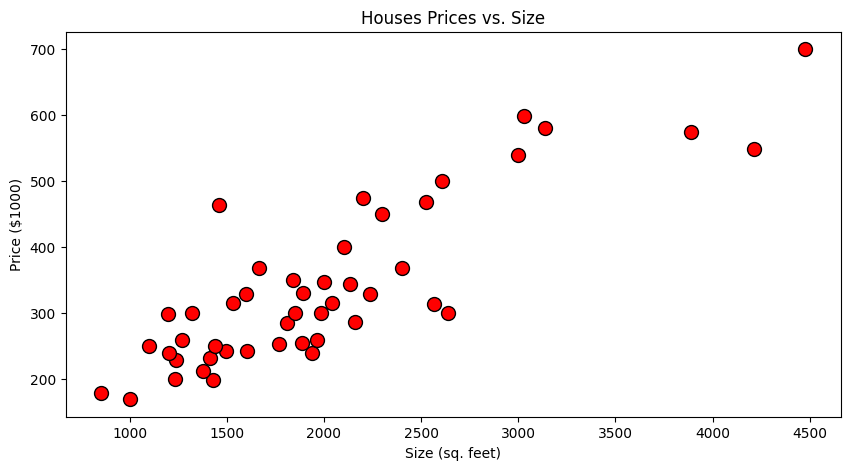

In [168]:
X = df_house.Size.values
y = df_house.Price.values / 1000 # represent price in $1000

plt.figure(figsize=(10,5))
plt.plot(X, y, 'ro', ms=10, mec='k')
plt.xlabel('Size (sq. feet)')
plt.ylabel('Price ($1000)')
plt.title('Houses Prices vs. Size')

### Trianing the model

Let's first recall what do we mean by finding the linear model. We define the hypothesis $h_\theta(x)$ to be a linear model for a single variable $x$
$$ 
h_{a,b}(x) = a + b x
$$

For each training example $x$, the predicted value of the model will be $h_{a,b}(x^{(i)})$. Our goal is to find the parameters $a, b$ of the model that will minimize the error of the model given by the following expression:
$$ 
J(a, b) = \frac{1}{2m} \sum_{i=1}^m \left( h_{a,b}(x^{(i)}) - y^{(i)}\right)^2.
$$
$J(a, b)$ is called the ``cost function`` of the model. Let's implement it and plot the different models, with the corresponding cost function values

Please, use different values of the model to see it and the effect on the Cost


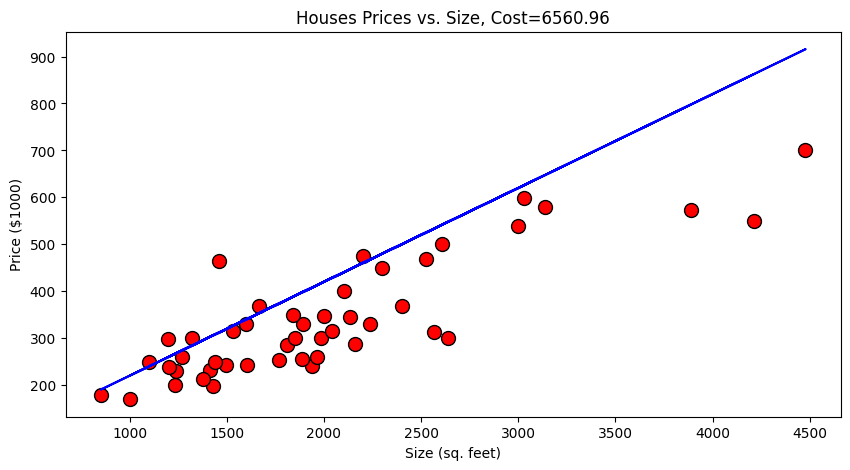

In [207]:
def hadash_cost_1D(X, y, a, b):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : 1D array of data points
    
    y : The values of the function at each data point
    
    a, b : the values of the model
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    """
    
    m = X.shape[0]
    y_predicted = X*a + b
    return np.sum((y-y_predicted)**2) / (2*m)

def hadash_plot_data_model(X, y, a, b):
    plt.figure(figsize=(10,5))
    plt.plot(X, y, 'ro', ms=10, mec='k')
    plt.plot(X, X*a+b, 'b')
    plt.xlabel('Size (sq. feet)')
    plt.ylabel('Price ($1000)')
    plt.title(f'Houses Prices vs. Size, Cost={np.round(hadash_cost_1D(X, y, a, b), decimals=2)}')

hadash_plot_data_model(X, y, 0.2, 20)


The process of training the model includes
* Starting with some initial values of $a, b$
* At each step compute the Cost of the model
* Change the values of $a, b$ trying to improve the Cost

This proces is called ``Optimization`` or ``Training`` the model. We will learn the basic algorithm which is based on computing the derivatives of the ``Cost`` function. The algorithm is called ``Gradient Descent``. The idea is that we gradually change the values of the parameters of the model according to the derivative of the ``Cost function``. The derivative indicates the rate of the change of the function. In addition, if the derivative is positive - the function is increasing, if it's negative - it's decreasing.

We change the values of the parameters according to the derivative of the ``Cost`` function with respect to each of the paramters, multiplying by the ``learning rate`` parameter $\alpha$
$$ 
a = a - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_{a,b}(x^{(i)}) - y^{(i)}\right)x^{(i)} \\
b = b - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_{a,b}(x^{(i)}) - y^{(i)}\right)
$$

Let's see the implementation

In [192]:
def hadash_gradient_descent(X, y, a, b, alpha, num_iters):
    """
    Performs gradient descent to learn `a` & `b`. Updates parameters by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : 1D array of data points
    
    y : The values of the function at each data point
    
    a, b : the values of the model
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    a, b : float
        the values of the trained model
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (hadash_cost_1D) and gradient here.
    """
    # Initialize some useful values
    m = X.shape[0]  # number of training examples
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        a = a - alpha * np.sum((X*a+b - y) * X) / m
        b = b - alpha * np.sum((X*a+b - y)) / m
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(hadash_cost_1D(X, y, a, b))
    
    return a, b, J_history

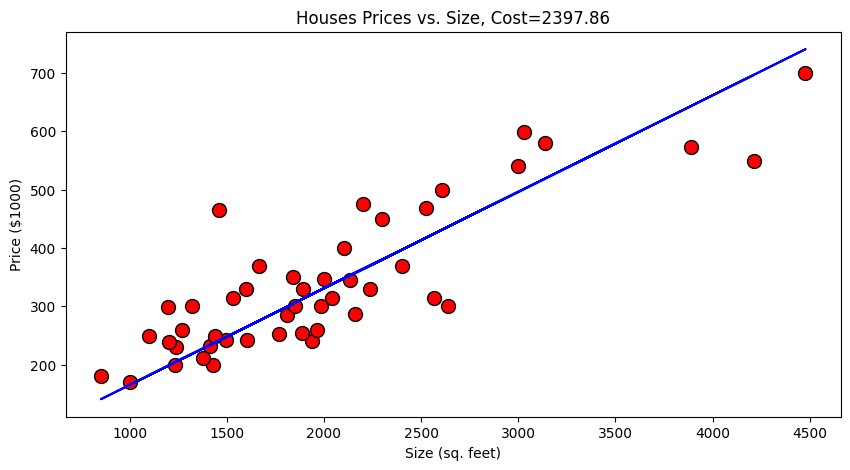

In [209]:
a_best, b_best, J_hist = hadash_gradient_descent(X, y, 0, 0, alpha=1e-8, num_iters=1000)
hadash_plot_data_model(X, y, a_best, b_best)


We see that using our implementation of the Linear Regression training with the Gradient Descent, we were able to find the model which improves very much the initial guess. We can also visualize the training process - how the Cost function changes with the iteration

Text(0.5, 1.0, 'Evolution of the Cost function (J) with the number of iterations')

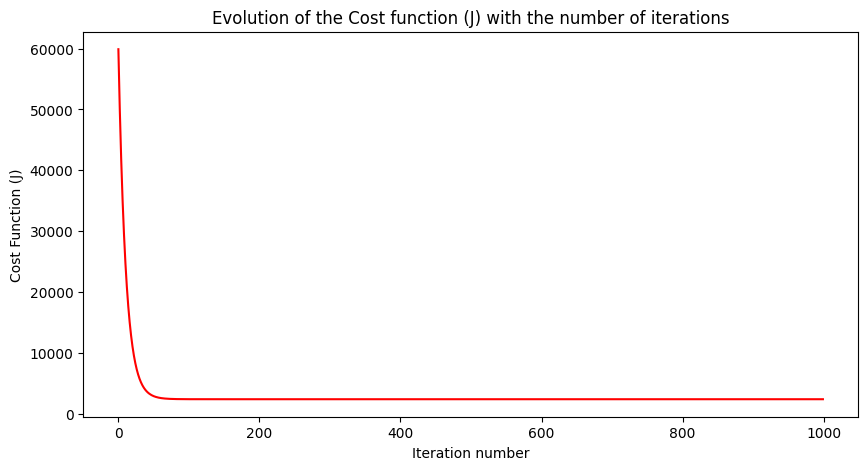

In [210]:
plt.figure(figsize=(10,5))
plt.plot(J_hist, 'r')
plt.xlabel('Iteration number')
plt.ylabel('Cost Function (J)')
plt.title(f'Evolution of the Cost function (J) with the number of iterations')
